In [57]:
import pandas as pd
import numpy as np

In [58]:
data = pd.read_csv("data.csv")
data = data.drop(columns = ['Unnamed: 32', 'id'])

As clustering already deals with outliers, we decided to omit the preprocessing present in the classification section.

In [59]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Next, a correlation matrix was used to evaluate the clusterability of the data set.

In [60]:
data['diagnosis']=(data['diagnosis']=='M').astype(int)
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


The columns dropped next were observed to have exceedingly high correlations with other attributes, so they were dropped under the assumption that not much information would be lost. Furthermore, this helped to alleviate the curse of dimensionality by reducing it.

In [61]:
data = data.drop(columns = {'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'})
data.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,...,0.408042,-0.006522,0.077972,0.456903,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,...,0.376169,-0.104321,-0.042641,0.297008,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,...,0.163851,0.009127,0.054458,0.912045,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,...,0.380676,0.200774,0.283607,0.036072,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,...,0.642262,0.229977,0.507318,0.248133,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,...,0.683260,0.178009,0.449301,0.299879,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,...,0.615634,0.095351,0.257584,0.292752,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,...,0.393298,0.449137,0.331786,0.090651,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,...,0.341198,0.345007,0.688132,-0.051269,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,...,0.513346,0.240567,0.227754,0.194799,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


Next, as the data would be expected to cluster into two groups (malignant and benign diagnoses), statistical properties of each assumed cluster were evaluated to determine their separability.

not exactly sure if this is right. feel free to correct it

In [62]:
mask = data['diagnosis'] == 1
data_m = data[mask]
data_b = data[~mask]

In [63]:
data_m.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,...,0.015060,0.020472,0.004062,29.318208,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,...,0.005517,0.010065,0.002041,5.434804,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,...,0.005174,0.007882,0.001087,16.670000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,...,0.011415,0.014615,0.002688,25.782500,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,...,0.014205,0.017700,0.003739,28.945000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,...,0.017497,0.022132,0.004892,32.690000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,...,0.040900,0.078950,0.012840,49.540000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [64]:
data_b.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,...,0.009858,0.020584,0.003636,23.515070,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,...,0.005709,0.006999,0.002938,5.493955,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,...,0.000000,0.009539,0.000895,12.020000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,...,0.006433,0.015600,0.002074,19.580000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,...,0.009061,0.019090,0.002808,22.820000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,...,0.011870,0.024060,0.004174,26.510000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,...,0.052790,0.061460,0.029840,41.780000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


array([[<AxesSubplot: title={'center': 'diagnosis'}>,
        <AxesSubplot: title={'center': 'radius_mean'}>,
        <AxesSubplot: title={'center': 'texture_mean'}>,
        <AxesSubplot: title={'center': 'smoothness_mean'}>,
        <AxesSubplot: title={'center': 'compactness_mean'}>],
       [<AxesSubplot: title={'center': 'concavity_mean'}>,
        <AxesSubplot: title={'center': 'concave points_mean'}>,
        <AxesSubplot: title={'center': 'symmetry_mean'}>,
        <AxesSubplot: title={'center': 'fractal_dimension_mean'}>,
        <AxesSubplot: title={'center': 'radius_se'}>],
       [<AxesSubplot: title={'center': 'texture_se'}>,
        <AxesSubplot: title={'center': 'perimeter_se'}>,
        <AxesSubplot: title={'center': 'area_se'}>,
        <AxesSubplot: title={'center': 'smoothness_se'}>,
        <AxesSubplot: title={'center': 'compactness_se'}>],
       [<AxesSubplot: title={'center': 'concavity_se'}>,
        <AxesSubplot: title={'center': 'concave points_se'}>,
       

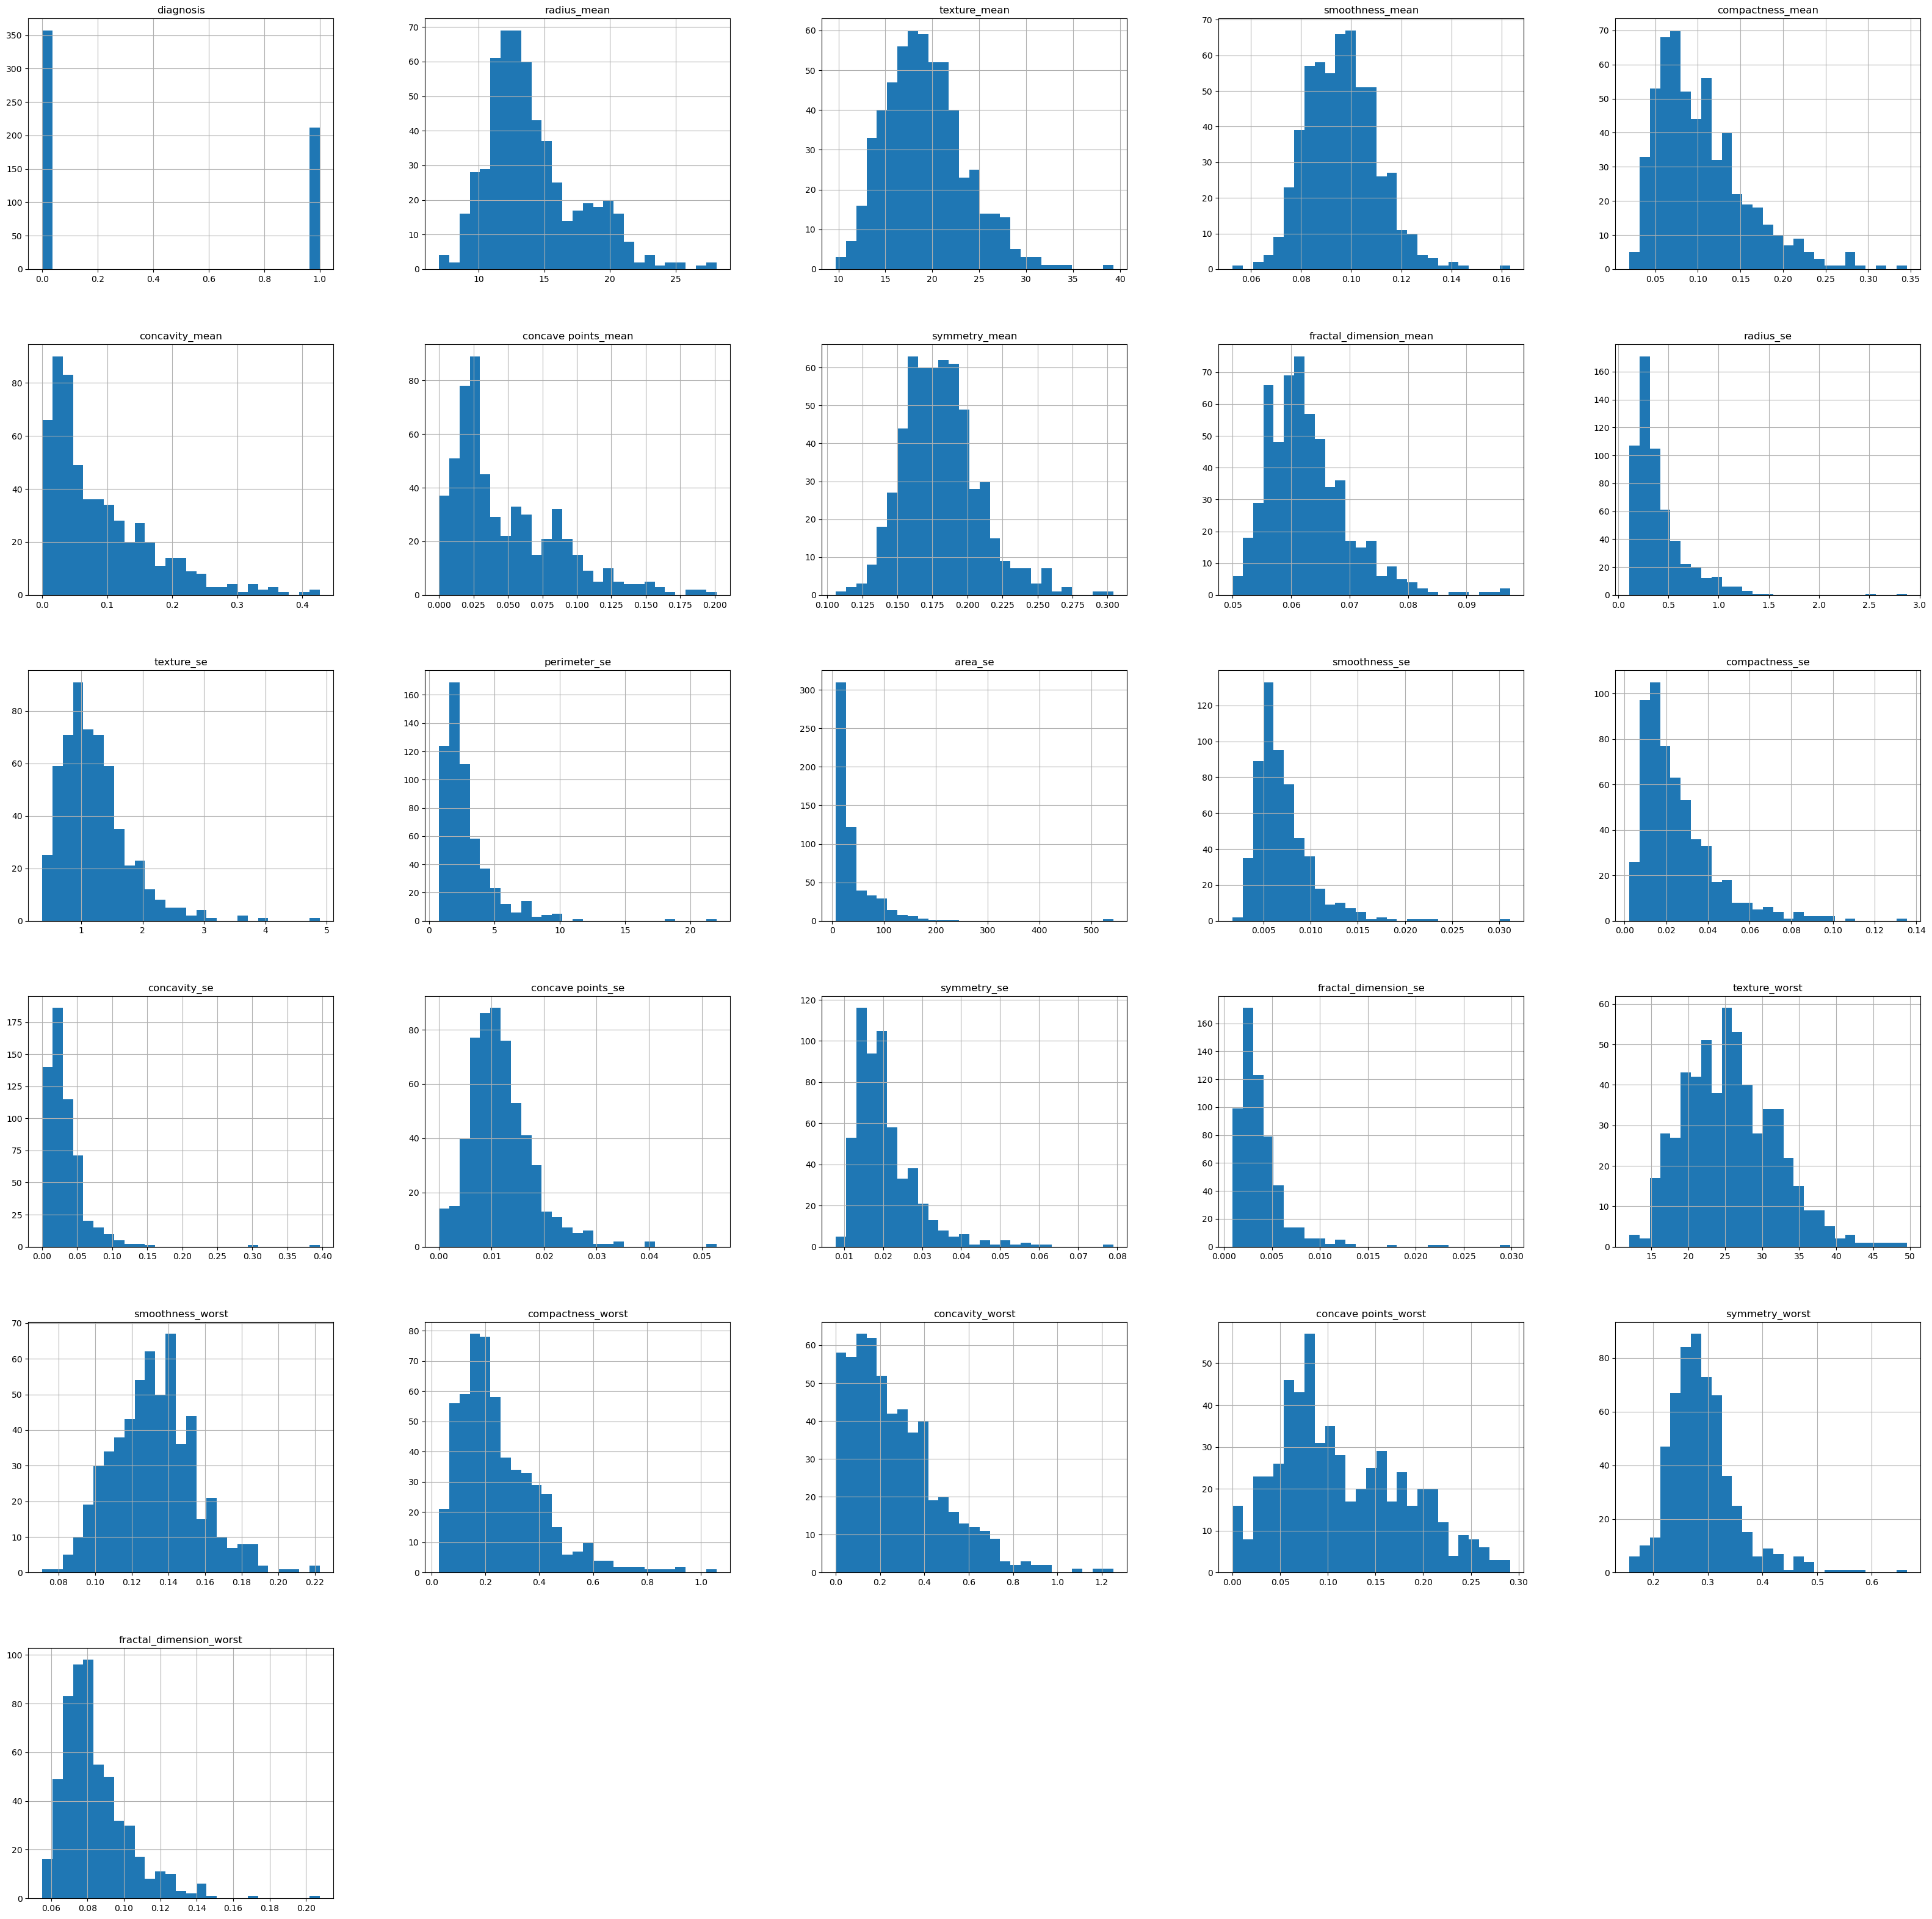

In [65]:
data.hist(figsize=(40,40), bins=27)

## OBS remove outliers after looking at the histograms

In [66]:
old_data = data
data = data.drop(columns = {'diagnosis'})

While the algorithm used is multi-dimensional, the columns 'radius_mean' and 'concave points_mean' are displayed as two of the attributes under consideration. If two groups emerge successfully, it is an indicator that these attributes in tandem correlates with the class of each object.

/home/tulsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='radius_mean', ylabel='concave points_mean'>

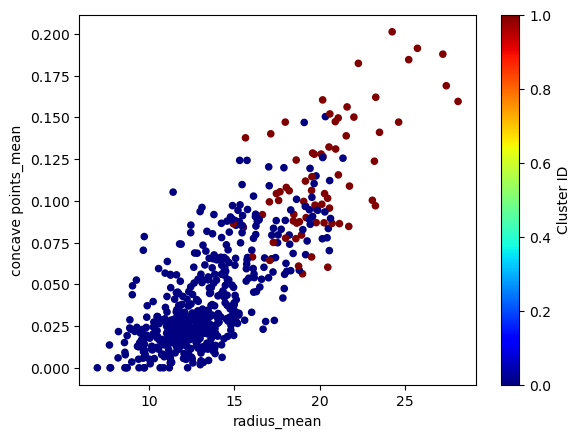

In [67]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2, max_iter=20000, random_state=1)
k_means.fit(data)

labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='radius_mean',y='concave points_mean',c='Cluster ID', colormap='jet')

In [68]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.244232,18.906250,0.095337,0.095455,0.072348,0.039499,0.178778,0.062953,0.324073,1.197126,...,0.010850,0.020235,0.003691,25.230444,0.131423,0.23680,0.243650,0.101599,0.287561,0.083603
1,20.127260,21.894658,0.103316,0.164714,0.200578,0.112922,0.197358,0.061739,0.956204,1.350890,...,0.018224,0.022630,0.004499,28.712877,0.138791,0.37293,0.466093,0.202985,0.307158,0.086273


Using actual class labels, each cluster is marked to represent one of them, and the accuracy of the pattern detection is assessed.

In [69]:
tn = 0
fn = 0
tp = 0
fp = 0
correct = 0

for i in range(1, len(labels)):
    lab = labels.iloc[i, 0]
    truth = old_data.iloc[i, 0]
    if lab == 1 and truth == 1:
        tn += 1
    elif lab == 1 and truth == 0:
        fn += 1
    elif lab == 0 and truth == 0:
        tp += 1
    else:
        fp += 1
    if lab != truth:
        correct += 1
        
print(tn, fn, tp, fp)
print('Recall: ' + str(tp/(tp+fp)))
print('Precision: '+ str(tp/(tp + fn)))
print('F-score: ' + str(2 * (tp/(tp+fp)) * (tp/(tp + fn)) / ((tp/(tp+fp)) + (tp/(tp + fn)))))

72 0 357 139
Recall: 0.719758064516129
Precision: 1.0
F-score: 0.8370457209847596


In [70]:
b = []
m = []
for i in range(len(labels)):
    if old_data.iloc[i, 0] == 1:
        m.append(old_data.iloc[i, 10])
    else:
        b.append(old_data.iloc[i, 10])
        


In [71]:
print(len(b))
print(len(m))
sorted_b = b.sort()
sorted_m = m.sort()

xb = [1 for i in range(len(b))]
xm = [1 for i in range(len(m))]


357
212


Overall, much like the used classifiers, we felt that the data was useful for clustering. While the resulting clusters in the example given don't look as distinct by itself, subsequent data reveals a more divisive split in multi-dimensional attribute space. It is worth noting, however, that clustering results are not as accurate as those of the classifiers tested. This could be due to a number of reasons, including but not limited to a higher sensitivity to outliers (and lack of preprocessing), as well as the possibility of clusters being concave in nature (though this seems unlikely based on the visual example).